In [14]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [8]:
bladder= pd.read_csv('bladder.csv') 
bladder

,id,rx,number,size,stop,event,enum
0,1,1,1,3,1,0,1
1,1,1,1,3,1,0,2
2,1,1,1,3,1,0,3
3,1,1,1,3,1,0,4
4,2,1,2,1,4,0,1
...,...,...,...,...,...,...,...
335,84,2,2,1,54,0,4
336,85,2,1,3,59,0,1
337,85,2,1,3,59,0,2
338,85,2,1,3,59,0,3


In [10]:
bladder['rx'].value_counts()

rx
1    188
2    152
Name: count, dtype: int64

In [15]:
kmf= KaplanMeierFitter()
kmf.fit(durations=bladder['stop'], event_observed=bladder['event'])


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 340 total observations, 228 right-censored observations>

<Axes: xlabel='timeline'>

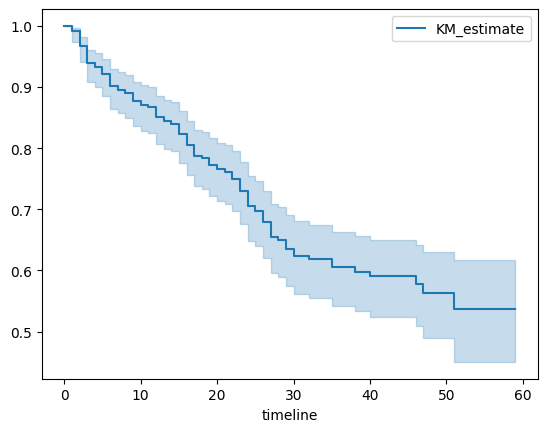

In [17]:
kmf.plot_survival_function()

In [ ]:
kmf.survival_function_

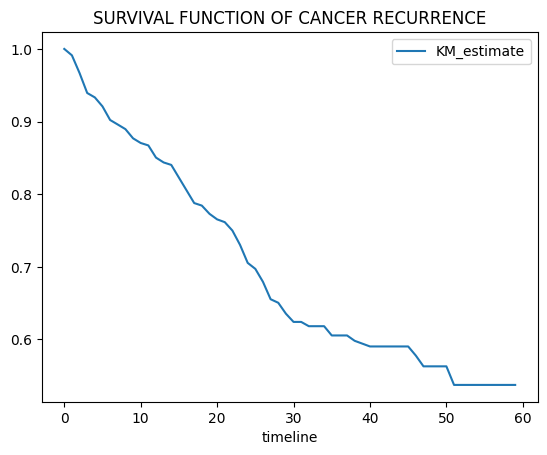

In [28]:
fig,ax = plt.subplots()
kmf.survival_function_.plot(ax=ax)
ax.set_title('SURVIVAL FUNCTION OF CANCER RECURRENCE')
plt.show()


In [ ]:
 # Lab-2 

In [16]:
from sklearn import linear_model
# Design matrices for stats models
from patsy import dmatrices

# K-Fold cross-validation and scoring
from sklearn.model_selection import KFold, cross_val_score

In [18]:
housing = pd.read_csv('housing_renamed.csv')
housing.columns

Index(['neighborhood', 'type', 'units', 'year_built', 'sq_ft', 'income',
       'income_per_sq_ft', 'expense', 'expense_per_sq_ft', 'net_income',
       'value', 'value_per_sq_ft', 'boro'],
      dtype='object')

In [3]:
# use this line to check what are available 
#import patsy
# print(dir(patsy))

['ContrastMatrix', 'DesignInfo', 'DesignMatrix', 'Diff', 'EvalEnvironment', 'EvalFactor', 'FactorInfo', 'Helmert', 'INTERCEPT', 'LinearConstraint', 'LookupFactor', 'ModelDesc', 'NAAction', 'Origin', 'PatsyError', 'Poly', 'SubtermInfo', 'Sum', 'Term', 'Treatment', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_reexport', 'balanced', 'bs', 'build', 'build_design_matrices', 'builtins', 'categorical', 'cc', 'center', 'compat', 'constraint', 'contrasts', 'cr', 'demo_data', 'desc', 'design_info', 'design_matrix_builders', 'dmatrices', 'dmatrix', 'eval', 'highlevel', 'incr_dbuilder', 'incr_dbuilders', 'infix_parser', 'mgcv_cubic_splines', 'missing', 'origin', 'parse_formula', 'patsy', 'redundancy', 'scale', 'splines', 'standardize', 'state', 'stateful_transform', 'te', 'tokens', 'user_util', 'util', 'version']


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [38]:
housing['value_per_sq_ft'].unique()

array([200.  , 242.76, 164.15, ...,  44.18,  57.75,  59.4 ], shape=(2166,))

In [24]:
# Get training and test data 

X_train, X_test , y_train, y_test = train_test_split(pd.get_dummies
    (housing[["units","sq_ft", "boro"]],drop_first=True
    ),
    housing["value_per_sq_ft"],
    test_size=0.20,
    random_state=42,
  )

            

In [30]:
y, X = dmatrices(
    "value_per_sq_ft ~ units + sq_ft + boro",
    housing,
    return_type="dataframe",
)
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.20, random_state=42
)

lr = LinearRegression().fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.6137125285029112


In [34]:
housing = pd.read_csv('housing_renamed.csv')
print(housing)

              neighborhood            type  units  year_built   sq_ft  \
0                FINANCIAL  R9-CONDOMINIUM     42      1920.0   36500   
1                FINANCIAL  R4-CONDOMINIUM     78      1985.0  126420   
2                FINANCIAL  RR-CONDOMINIUM    500         NaN  554174   
3                FINANCIAL  R4-CONDOMINIUM    282      1930.0  249076   
4                  TRIBECA  R4-CONDOMINIUM    239      1985.0  219495   
...                    ...             ...    ...         ...     ...   
2621              ROSEBANK  R4-CONDOMINIUM     52         NaN   62391   
2622  ARROCHAR-SHORE ACRES  R4-CONDOMINIUM    102      1987.0   90618   
2623            GRANT CITY  R4-CONDOMINIUM    100      1986.0   78903   
2624            GRANT CITY  R4-CONDOMINIUM    159      1961.0  166712   
2625           GREAT KILLS  R4-CONDOMINIUM     67      1965.0  108864   

        income  income_per_sq_ft  expense  expense_per_sq_ft  net_income  \
0      1332615             36.51   342005      

In [36]:
kf = KFold(n_splits=5)
y, X = dmatrices('value_per_sq_ft ~ units + sq_ft + boro', housing)

In [38]:
coefs = []
scores = []
for train, test in kf.split(X):
  X_train, X_test = X[train], X[test]
  y_train, y_test = y[train], y[test]
  lr = LinearRegression().fit(X_train, y_train)
  coefs.append(pd.DataFrame(lr.coef_))
  scores.append(lr.score(X_test, y_test))

In [40]:
coefs_df = pd.concat(coefs)
coefs_df.columns = X.design_info.column_names
print(coefs_df)

   Intercept  boro[T.Brooklyn]  boro[T.Manhattan]  boro[T.Queens]  \
0        0.0         33.369037         129.904011       32.103100   
0        0.0         32.889925         116.957385       31.295956   
0        0.0         30.975560         141.859327       32.043449   
0        0.0         41.449196         130.779013       33.050968   
0        0.0        -38.511915          56.069855      -17.557939   

   boro[T.Staten Island]     units     sq_ft  
0              -4.381085 -0.205890  0.000220  
0              -4.919232 -0.146180  0.000155  
0              -4.379916 -0.179671  0.000194  
0              -3.430209 -0.207904  0.000232  
0               0.000000 -0.145829  0.000202  


In [42]:
print(scores)

[0.027314162909645057, -0.553836221212372, -0.1563637168784675, -0.32342020619865597, -1.6929655586459207]


In [44]:
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5)
print(scores)

[ 0.02731416 -0.55383622 -0.15636372 -0.32342021 -1.69296556]


In [46]:
print(scores.mean())

-0.5398543080051542


In [72]:
y1, X1 = dmatrices(
   "value_per_sq_ft ~ units + sq_ft + boro", housing)

y2, X2 = dmatrices("value_per_sq_ft ~ units*sq_ft + boro", housing)

y3, X3 = dmatrices(
  "value_per_sq_ft ~ units + sq_ft*boro + type", housing
)

y4, X4 = dmatrices(
    "value_per_sq_ft ~ units + sq_ft*boro + sq_ft*type", housing
)

y5, X5 = dmatrices("value_per_sq_ft ~ boro + type", housing)


In [50]:
model = LinearRegression()

scores1 = cross_val_score(model, X1, y1, cv=5)
scores2 = cross_val_score(model, X2, y2, cv=5)
scores3 = cross_val_score(model, X3, y3, cv=5)
scores4 = cross_val_score(model, X4, y4, cv=5)
scores5 = cross_val_score(model, X5, y5, cv=5)

In [117]:
from sklearn.model_selection import cross_val_score

# Step 1: Initialize the linear regression model
model = LinearRegression()

# Step 2: Perform 5-fold cross-validation for each design matrix

scores1 = cross_val_score(model, X1, Y1.values.ravel(), cv=5, scoring='r2')
scores2 = cross_val_score(model, X2, Y2.values.ravel(), cv=5, scoring='r2')
scores3 = cross_val_score(model, X3, Y3.values.ravel(), cv=5, scoring='r2')
scores4 = cross_val_score(model, X4, Y4.values.ravel(), cv=5, scoring='r2')
scores5 = cross_val_score(model, X5, Y5.values.ravel(), cv=5, scoring='r2')

# Step 3: Display the R-squared scores for verification

print("Scores1 (X1, Y1):", scores1)
print("Scores2 (X2, Y2):", scores2)
print("Scores3 (X3, Y3):", scores3)
print("Scores4 (X4, Y4):", scores4)
print("Scores5 (X5, Y5):", scores5)

Scores1 (X1, Y1): [ 0.02731416 -0.55383622 -0.15636372 -0.32342021 -1.69296556]
Scores2 (X2, Y2): [ 0.04074958 -0.51177343 -0.14583516 -0.3376579  -4.48640038]
Scores3 (X3, Y3): [ 0.08191348 -0.39993361 -0.12240908 -0.42484843 -1.54630247]
Scores4 (X4, Y4): [ 0.08399286 -0.37538215 -0.1115328  -0.40733111 -1.9399717 ]
Scores5 (X5, Y5): [ 0.03236462 -0.63008528 -0.1705417  -0.42687191 -1.34084571]


In [65]:
model = LinearRegression()

scores1 = cross_val_score(model, X1, y1, cv=5)
scores2 = cross_val_score(model, X2, y2, cv=5)
scores3 = cross_val_score(model, X3, y3, cv=5)
scores4 = cross_val_score(model, X4, y4, cv=5)
scores5 = cross_val_score(model, X5, y5, cv=5)

In [67]:
scores_df = pd.DataFrame([scores1, scores2, scores3, scores4, scores5])
print(scores_df.apply(np.mean, axis=1))

0   -0.539854
1   -1.088183
2   -0.482316
3   -0.550045
4   -0.507196
dtype: float64


Expected Output
# 0   -5.398543e-01
# 1   -1.088184e+00
# 2   -4.719338e+25
# 3   -6.826894e+25
# 4   -2.355763e+24
# dtype: float64